In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.rcParams['lines.markeredgecolor'] = 'w'
mpl.rcParams['lines.markeredgewidth'] = .5
import numpy as np
from numpy import polyfit, polyval
from numpy import trapz

# Homework 7
# Ethan Gallup
# Unid: u1033198

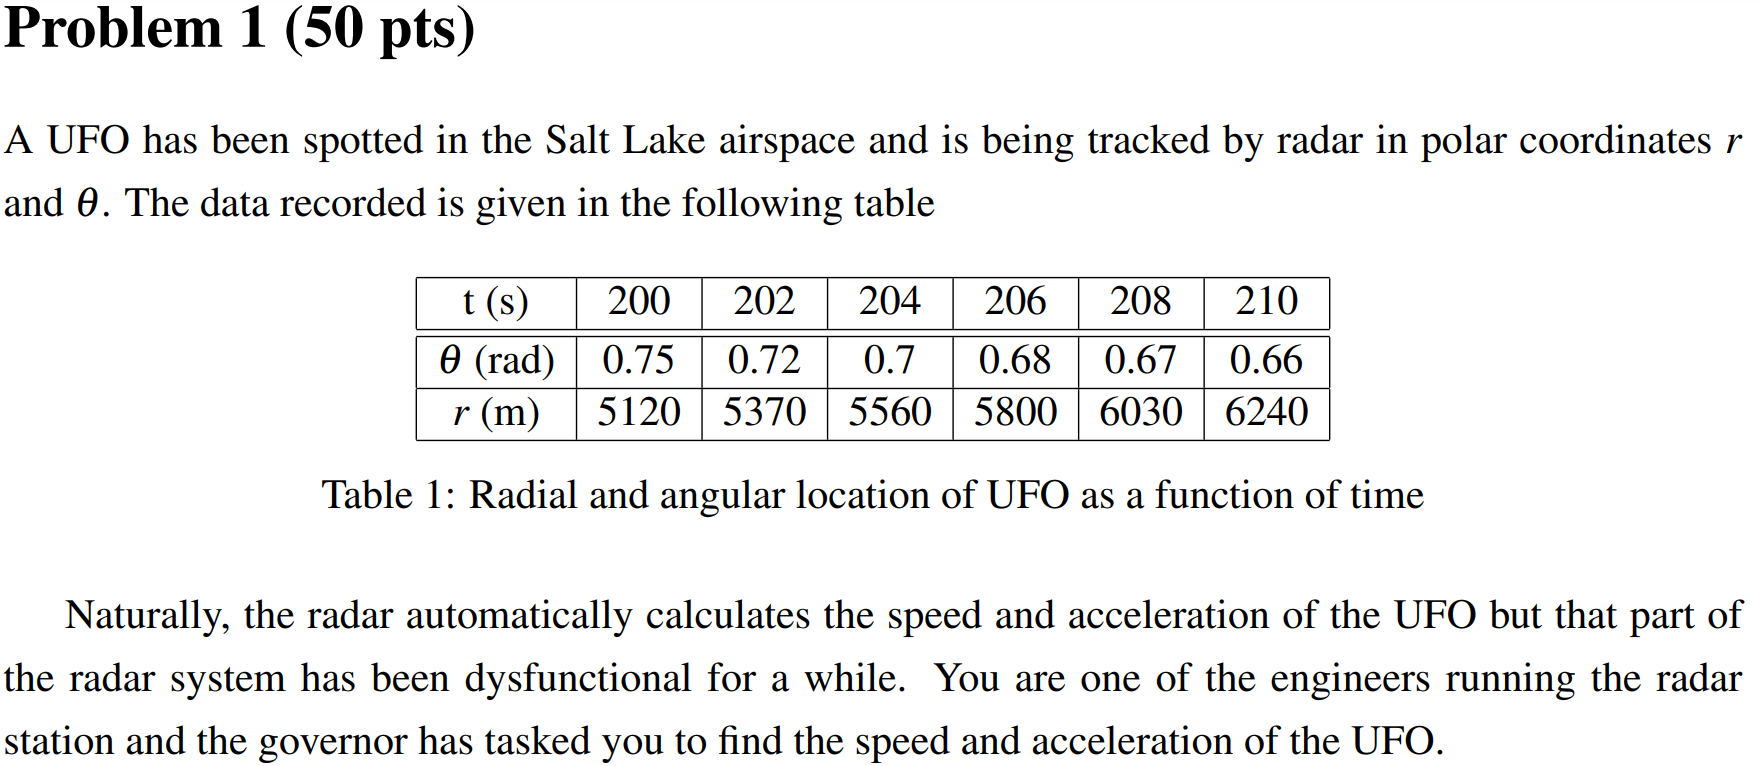

1. Use second order finite differencing to find the vector expressions for the velocity u and acceleration a of the UFO at t = 210 s. Recall that the velocity and acceleration in radial coordinates are given by:
$$
\mathbf{u} = \dot{r}\mathbf{e}_r+r\dot{\theta}\mathbf{e}_{\theta}; \ \ \ \ \mathbf{a} = (\ddot{r}-r\dot{\theta}^2)\mathbf{e}_r+(r\ddot{\theta}+2\dot{r}\dot{\theta})\mathbf{e}_{\theta}
$$
where $\dot{r}=\frac{dr}{dt}$, $\dot{\theta}=\frac{d\theta}{dt}$, etc... and $\mathbf{e}_r$ and $\mathbf{e}_{\theta}$ are unit vectors in the radial and tangential directions,
respectively. Do this “by hand” - (but you can use Python to verify your results). Note that you
can find second order finite difference formulas for first and second derivatives on the slide

$$
\mathbf{u} = \dot{r}\mathbf{e}_r+r\dot{\theta}\mathbf{e}_{\theta}
$$
use backwards formula
$$
\mathbf{u} = \frac{\partial r}{\partial t}\mathbf{e}_r+r\frac{\partial \theta}{\partial t}\mathbf{e}_{\theta}\\
\mathbf{u} = \left[\frac{3r_i-4r_{i-1}+r_{i-2}}{2\Delta t}\right]\mathbf{e}_r+r\left[\frac{3\theta_i-4\theta_{i-1}+\theta_{i-2}}{2\Delta t}\right]\mathbf{e}_{\theta}
$$


$$
\mathbf{u} = \left[\frac{3(6240)-4(6030)+(5800)}{2(2)}\right]\mathbf{e}_r+6240\left[\frac{3(0.66)-4(0.67)+0.68}{2(2)}\right]\mathbf{e}_{\theta}
$$

$$
\mathbf{a} = (\ddot{r}-r\dot{\theta}^2)\mathbf{e}_r+(r\ddot{\theta}+2\dot{r}\dot{\theta})\mathbf{e}_{\theta}
$$
use backwards formula
$$
\mathbf{a} = \left(\frac{\partial^2 r}{\partial t^2}-r\left(\frac{\partial \theta}{\partial t}\right)^2\right)\mathbf{e}_r+\left(r\frac{\partial^2 \theta}{\partial t^2}+2\frac{\partial r}{\partial t}\frac{\partial \theta}{\partial t}\right)\mathbf{e}_{\theta}
$$
$$
\mathbf{a} = \left(\left[\frac{-r_{i-3}+4r_{i-2}-5r_{i-1}+2r_i}{\Delta t^2}\right]-r\left[\frac{3\theta_i-4\theta_{i-1}+\theta_{i-2}}{2\Delta t}\right]^2\right)\mathbf{e}_r+\left(r\left[\frac{-\theta_{i-3}+4\theta_{i-2}-5\theta_{i-1}+2\theta_i}{\Delta t^2}\right]+2\left[\frac{3r_i-4r_{i-1}+r_{i-2}}{2\Delta t}\right]\left[\frac{3\theta_i-4\theta_{i-1}+\theta_{i-2}}{2\Delta t}\right]\right)\mathbf{e}_{\theta}
$$

$$
\mathbf{a} = \left(\left[\frac{-5560+4(5800)-5(6030)+2(6240)}{2^2}\right]-6240\left[\frac{3(0.66)-4(0.67)+0.68}{2(2)}\right]^2\right)\mathbf{e}_r+\left(6240\left[\frac{-0.7+4(0.68)-5(0.67)+2(0.66)}{2^2}\right]+2\left[\frac{3(6240)-4(6030)+(5800)}{2(2)}\right]\left[\frac{3(0.66)-4(0.67)+0.68}{2(2)}\right]\right)\mathbf{e}_{\theta}
$$

In [10]:
t = np.arange(200, 211, 2)
θ = np.array([.75, .72, .7, .68, .67, .66])
r = np.array([5120, 5370, 5560, 5800, 6030, 6240])

i = -1

rdot = (3*r[i] - 4*r[i-1]+r[i-2])/4
θdot = (3*θ[i] - 4*θ[i-1]+θ[i-2])/4
rddot = (-r[i-3] + 4*r[i-2] - 5*r[i-1] + 2*r[i])/4
θddot = (-θ[i-3] + 4*θ[i-2] - 5*θ[i-1] + 2*θ[i])/4

uer, ueθ = rdot, r[i]*θdot
aer = (rddot - r[i]*θdot**2)
aeθ = (r[i]*θddot + 2*rdot*θdot)

print(f'u = {uer:.2f}e_r + {ueθ:.2f}e_θ')
print(f'a = {aer:.2f}e_r + {aeθ:.2f}e_θ')

u = 100.00e_r + -31.20e_θ
a = -7.66e_r + -16.60e_θ


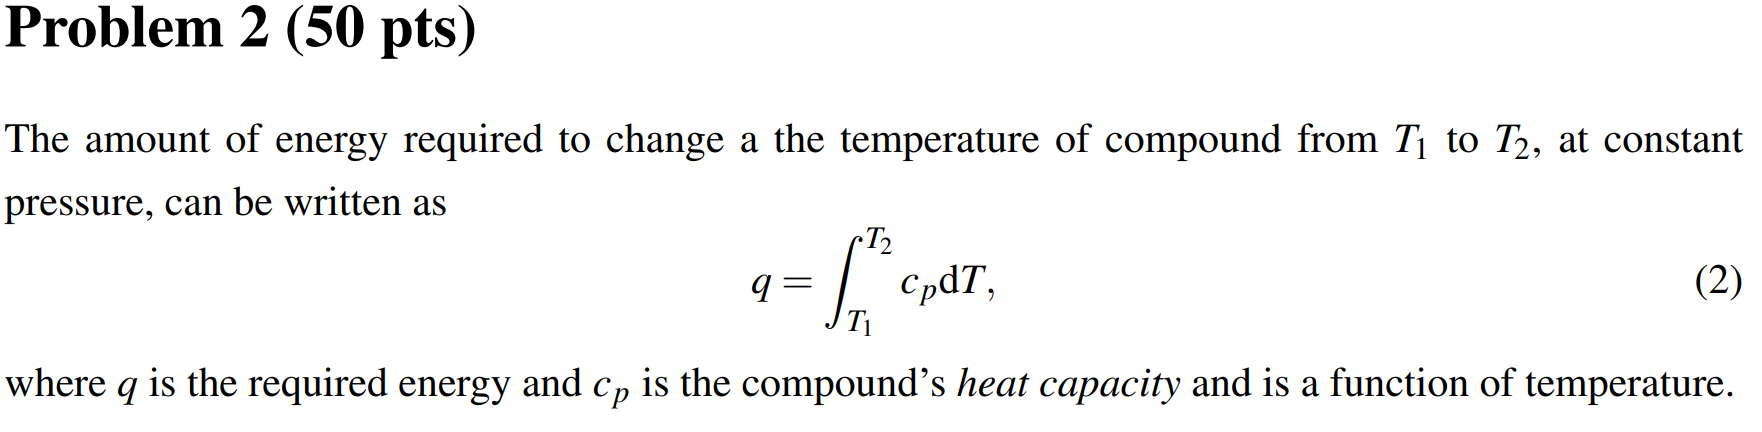

1. Using the data for $C_p(T)$ from Table 2, determine how much energy is required to heat one kg of $CO_2$, steel, and graphite from $T_1 = 400 K$ to $T_2 = 1000 K$. Do this using the Trapezoid rule (implement your own - you can adopt the codes developed in class). You may use Python’s trapz function to check your results. Summarize your results in a table listing the heat required for each compound.

In [3]:
def traprule(x,y):
    n = len(x)
    return np.sum([0.5*(x[i+1]-x[i])*(y[i] + y[i+1]) for i in range(n-1)])


In [4]:
T = np.arange(400, 1001, 50)
CO2 = np.array([0.942, 0.981, 1.02, 1.05, 1.08, 1.10, 1.13, 1.15, 1.17, 1.187, 1.204, 1.220, 1.234])
Q_CO2 = traprule(T, CO2)
T = np.arange(400, 1001, 200)
steel = np.array([487, 559, 685, 1169])
Q_steel = traprule(T, steel)
graphite = np.array([992, 1406, 1650, 1793])
Q_graphite = traprule(T, graphite)
print(f'Q CO\u2082:      {Q_CO2:.1f} \nQ steel:    {Q_steel:.1f} \nQ graphite: {Q_graphite:.1f}')

Q CO₂:      669.0 
Q steel:    414400.0 
Q graphite: 889700.0


In [6]:
T = np.arange(400, 1001, 50)
CO2 = np.array([0.942, 0.981, 1.02, 1.05, 1.08, 1.10, 1.13, 1.15, 1.17, 1.187, 1.204, 1.220, 1.234])
Q_CO2 = trapz(CO2, T)
T = np.arange(400, 1001, 200)
steel = np.array([487, 559, 685, 1169])
Q_steel = trapz(steel, T)
graphite = np.array([992, 1406, 1650, 1793])
Q_graphite = trapz(graphite, T)
print(f'Q CO\u2082:      {Q_CO2:.1f} \nQ steel:    {Q_steel:.1f} \nQ graphite: {Q_graphite:.1f}')

Q CO₂:      669.0 
Q steel:    414400.0 
Q graphite: 889700.0


### Results Summary
||Heat Added|
|-|-|
|Q CO₂|669.0|
|Q steel|414400.0|
|Q graphite|889700.0|

The numpy trapz function got the same results as our traprule function. All is well.